In [1]:
!pip install pyLDAvis
!pip install arabic_reshaper
!pip install python-bidi

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import re


df = pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/urdu-news-dataset-1M.csv',encoding='utf-8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Index,Headline,News Text,Category,Date,URL,Source,News length
0,0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,12/6/2020,https://www.dawnnews.tv/news/1148499/,Dawn News,1854.0
1,1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,12/6/2020,https://www.dawnnews.tv/news/1148498/,Dawn News,2016.0
2,2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148433/,Dawn News,2195.0
3,3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148430/,Dawn News,2349.0
4,4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,12/5/2020,https://www.dawnnews.tv/news/1148421/,Dawn News,2655.0


In [5]:
data_pre=df.drop(columns=['Index','Date','URL','Source','News length'])
data_pre.head()
data_pre=data_pre.loc[df['Category'] == 'Business & Economics']

In [6]:
data_pre['News Text'] = \
data_pre['News Text'].map(lambda x: re.sub('[,\\.!?]', '', str(x)))
data_pre['News Text'].head()

0    اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...
1    اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...
2    اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...
3    اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...
4    اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...
Name: News Text, dtype: object

In [7]:
import nltk
stopwords=pd.read_csv('/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/stopwords-ur.txt',names=['List'])
# stopwords['List']

stopwords_ur=[]
for li in stopwords['List']:
  stopwords_ur.append(li)
print(stopwords_ur.append('میں'))

None


In [8]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [9]:
def remove_stopwords(texts):
  # dirs=[]
  # for doc in texts:
  #   birs=[]
  #   for word in simple_preprocess(str(doc)):
  #     if word not in stop_words:
  #       birs.append(word)
  #   final=" ".join(birs)
  #   dirs.append(final)
  # return dirs
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stopwords_ur] for doc in texts]

In [10]:
data = data_pre['News Text'].values.tolist()
print((data[19]))

ممبئی بھارت کی معیشت جولائی اور ستمبر کے دوران 75 فیصد سکڑنے سے بدترین کارکردگی کا مظاہرہ کرنے والی بڑی ترقی یافتہ اور ابھرتی ہوئی معیشتوں میں شامل ہوگئی کیونکہ یہ ازادی کے بعد پہلی مرتبہ تکنیکی کساد بازاری میں داخل ہوئی ہےڈان اخبار میں شائع فرانسیسی خبررساں ادارے اے ایف پی کی رپورٹ میں بتایا گیا کہ سرکاری اعداد شمار ظاہر کرتے ہیں کہ معیشت کساد بازاری میں داخل ہوگئی ہےاگرچہ گزشتہ سہ ماہی میں ریکارڈ 239 فیصد سکڑنے کے مقابلے میں اعداد شمار میں بہتری تھی تاہم یہ اس طرف اشارہ کرتے ہیں کہ ایشیا کی تیسری بڑی معیشت سخت مقابلہ کر رہی ہے کیونکہ یہ طلب کو بحال کرنے اور روزگار پیدا کرنے کی کوششوں میں ہے جبکہ کورونا وائرس کا انفیکشن بڑھ رہا ہےمزید پڑھیں بھارت میں کورونا کی ابتر صورتحال ایک دن میں 90 ہزار سے زائد کیسز رپورٹتاہم مسلسل سہ ماہیوں میں معیشت کے سکڑنے کا مطلب ہے کہ ملک 1947 کے بعد سے پہلی مرتبہ تکنیکی کساد بزاری میں داخل ہوگیا ہےوائرس سے متعلق لاک ڈانز سے ہونے والی عالمی تباہی کے بعد امریکا جاپان اور جرمنی سمیت بڑی معیشتوں کی جانب سے 30 ستمبر کو ختم ہونے والی سہ ماہی میں ریکارڈ کی گئی تر

In [11]:
data_words = list(sent_to_words(data))
# print((data_words))

In [12]:
data_words = remove_stopwords(data_words)
# print(data_words)

In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
print(id2word)
count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
# a,b=corpus[0][0]
# print(a,b)

# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

Dictionary(84580 unique tokens: ['اجرا', 'اخبار', 'اداروں', 'اس', 'اسلام']...)
0 اجرا
1 اخبار
2 اداروں
3 اس
4 اسلام
5 اسمعیل
6 اضافی
7 اضافے
8 اضلاع
9 امکان
10 ان


In [14]:
num_topics=20
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.054*"جی" + 0.052*"سی" + 0.049*"گیس" + 0.039*"این" + 0.039*"بجلی" + 0.029*"ایل" + 0.021*"سے" + 0.015*"پاور" + 0.015*"پی" + 0.014*"صارفین"
Topic: 1 
Words: 0.037*"روپے" + 0.029*"سے" + 0.023*"کلو" + 0.021*"فروخت" + 0.020*"گندم" + 0.018*"قیمت" + 0.018*"ٹن" + 0.011*"لاکھ" + 0.011*"چینی" + 0.011*"کپاس"
Topic: 2 
Words: 0.069*"روپے" + 0.045*"قیمت" + 0.037*"قیمتوں" + 0.028*"پیسے" + 0.027*"کا" + 0.027*"اضافہ" + 0.023*"سے" + 0.021*"اضافے" + 0.019*"مصنوعات" + 0.017*"تیل"
Topic: 3 
Words: 0.063*"سے" + 0.053*"کا" + 0.035*"کو" + 0.027*"اس" + 0.024*"بھی" + 0.023*"نے" + 0.022*"نہیں" + 0.013*"کر" + 0.012*"کیا" + 0.011*"حکومت"
Topic: 4 
Words: 0.030*"پاکستان" + 0.026*"سے" + 0.025*"سرمایہ" + 0.021*"کاری" + 0.015*"نے" + 0.014*"معیشت" + 0.014*"لیے" + 0.014*"کا" + 0.013*"معاشی" + 0.013*"کہا"
Topic: 5 
Words: 0.047*"نے" + 0.028*"کا" + 0.023*"کو" + 0.017*"کیا" + 0.017*"سے" + 0.017*"کیلیے" + 0.016*"کہا" + 0.014*"اسلام" + 0.014*"اجلاس" + 0.013*"جايے"
Topic: 6 
Words: 0.059*"پاکستان" + 0.033*"

In [16]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.215308 -0.098116       1        1  18.028018
5     -0.347058 -0.138173       2        1  11.268677
4     -0.043591 -0.174838       3        1   6.629822
8     -0.132400 -0.311964       4        1   5.941101
16    -0.020932  0.302059       5        1   5.581823
15    -0.108218  0.104213       6        1   5.092994
12    -0.329619  0.303969       7        1   4.783465
0     -0.315994 -0.299554       8        1   4.591501
13     0.004440 -0.436694       9        1   4.412285
6      0.221854 -0.341285      10        1   4.403104
9      0.104467 -0.244587      11        1   4.047106
10     0.196062  0.294811      12        1   3.910556
19    -0.398548  0.102332      13        1   3.900802
11     0.079266  0.144471      14        1   3.541779
2     -0.208955  0.236405      15        1   3.471664
1     -0.078537  0.434238      16        1   3.147007
7      0.250668 -0.089434      17        1   2.564618
14     0.458985 -0.158421      18        1   2.077847
17     0.492986  0.079687      19        1   1.470146
18     0.390430  0.290882      20        1   1.135686, topic_info=       Term          Freq         Total Category  logprob  loglift
221    روپے  53091.000000  53091.000000  Default  30.0000  30.0000
148    ڈالر  22512.000000  22512.000000  Default  29.0000  29.0000
175     ارب  25242.000000  25242.000000  Default  28.0000  28.0000
247    فیصد  21874.000000  21874.000000  Default  27.0000  27.0000
743    قیمت  20738.000000  20738.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
106    لاکھ    795.363035  12266.774152  Topic20  -4.0958   1.7421
751    والی    454.750309   5828.473971  Topic20  -4.6549   1.9272
2061  لمیٹڈ    281.283840   1013.702181  Topic20  -5.1352   3.1959
136      وی    242.472893    463.657299  Topic20  -5.2837   3.8297
1124    نيی    320.036079   4712.439993  Topic20  -5.0062   1.7884

[1240 rows x 6 columns], token_table=      Topic      Freq Term
term                      
565       1  0.881087   اب
565       5  0.018056   اب
565       6  0.042764   اب
565      12  0.030251   اب
565      15  0.027717   اب
...     ...       ...  ...
854       6  0.046447  یکم
854      10  0.015482  یکم
854      12  0.143987  یکم
854      15  0.678906  یکم
854      17  0.114570  یکم

[2406 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 9, 17, 16, 13, 1, 14, 7, 10, 11, 20, 12, 3, 2, 8, 15, 18, 19])

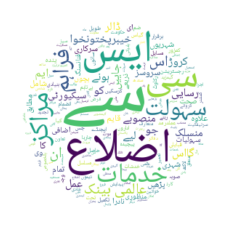

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

long_string = ','.join(list(data_words[0]))


configuration = {
    "language": "Urdu"
}
reshaper = ArabicReshaper(configuration=configuration)

text = reshaper.reshape(long_string)
text = get_display(text)


x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white",font_path='/content/gdrive/MyDrive/Dataset(Colab)/UrduTopicModelling/NotoNaskhArabic-Regular.ttf', repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")